### 코랩(리눅스)에서 한글 파일명이 자음과 모음으로 분리되는 현상 해결방법
from unicodedata import normalize

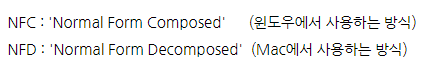

In [1]:
# os 모듈 연결
from unicodedata import normalize
import os

fnames=os.listdir("./images/")

In [2]:
print(fnames[0][:3])
print(normalize('NFC', fnames[0][:3]))

dog
dog


In [3]:
from unicodedata import normalize
import os

fnames=os.listdir("./images/")
new_fnames=[]

for fname in fnames:
    new_fnames.append(normalize('NFC', fname))

print(new_fnames)

['dog5_300.jpg', 'dog10.jpg', 'dog5.jpg', 'dog4.jpg', 'dog10_300.jpg', 'dog6.jpg', 'dog7.jpg', 'dog3.jpg', 'dog2.jpg', 'dog4_300.jpg', 'dog1.jpg', 'cat1.jpg', 'cat2.jpg', 'dog6_300.jpg', 'cat3.jpg', 'dog7_300.jpg', 'cat6.jpg', 'cat4.jpg', 'cat5.jpg', 'dog2_300.jpg', 'dog3_300.jpg', 'dog1_300.jpg', 'dog8_300.jpg', 'dog9_300.jpg', 'dog9.jpg', 'dog8.jpg']


In [4]:
print(new_fnames[0][:3])

dog


In [6]:
# 데이터 읽어와 정보 저장하기
from PIL import Image
import pandas as pd

imgInfo=[]  # 파일 정보 저장 리스트 변수 생성

for fname in new_fnames:
    tmp=Image.open("./images/"+fname)
    tmpsize=tmp.size   # 이미지 사이즈 튜플 형식으로 저장
    # 파일정보 변수에 저장
    imgInfo.append([fname, tmpsize[0], tmpsize[1]])

    # 강아지/고양이 사이즈 변경(강아지_300*300, 고양이_250*250)
    if fname[:3] == "강아지":
        tmpResize=tmp.resize((300,300))
    else:
        tmpResize=tmp.resize((250,250))

    # 변경 이미지 저장
    tmpResize.save("./"+fname[:3]+"/"+fname) 

print(imgInfo)
print()
print("=== END ===")

df1=pd.DataFrame(imgInfo, columns=["파일명", "가로", "세로"])
df1


[['dog5_300.jpg', 300, 300], ['dog10.jpg', 599, 400], ['dog5.jpg', 564, 400], ['dog4.jpg', 356, 400], ['dog10_300.jpg', 300, 300], ['dog6.jpg', 533, 400], ['dog7.jpg', 537, 400], ['dog3.jpg', 433, 400], ['dog2.jpg', 584, 400], ['dog4_300.jpg', 300, 300], ['dog1.jpg', 377, 400], ['cat1.jpg', 683, 512], ['cat2.jpg', 650, 433], ['dog6_300.jpg', 300, 300], ['cat3.jpg', 819, 512], ['dog7_300.jpg', 300, 300], ['cat6.jpg', 600, 375], ['cat4.jpg', 500, 321], ['cat5.jpg', 683, 512], ['dog2_300.jpg', 300, 300], ['dog3_300.jpg', 300, 300], ['dog1_300.jpg', 300, 300], ['dog8_300.jpg', 300, 300], ['dog9_300.jpg', 300, 300], ['dog9.jpg', 510, 400], ['dog8.jpg', 533, 400]]

=== END ===


,파일명,가로,세로
0,dog5_300.jpg,300,300
1,dog10.jpg,599,400
2,dog5.jpg,564,400
3,dog4.jpg,356,400
4,dog10_300.jpg,300,300
5,dog6.jpg,533,400
6,dog7.jpg,537,400
7,dog3.jpg,433,400
8,dog2.jpg,584,400
9,dog4_300.jpg,300,300
